# Initial Data Exploration

In [95]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

# sets the maximum number of columns that will be displayed in a dataframe to 200 for improved data viewing
pd.set_option('display.max_columns', None)

In [185]:
# Optional: install fonts if needed
# matplotlib.font_manager._rebuild()  # Rebuild if you add fonts manually

# Custom color palette inspired by CUSTOM
CUSTOM_PALETTE = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC948", "#B07AA1", "#FF9DA7", "#9C755F", "#BAB0AC"]
sns.set_palette(CUSTOM_PALETTE)
plt.style.use('ggplot')

# Seaborn style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.15, rc={"grid.linewidth": 0.6})

# Matplotlib rcParams
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'DejaVu Sans',  # Or try 'Segoe UI', 'Calibri', etc.
    'font.weight': 'normal',
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.titlepad': 25,
    'axes.labelsize': 14,
    'axes.labelweight': 'regular',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'grid.color': '#D3D3D3',
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'figure.figsize': (10, 6),
    'figure.dpi': 100,
    'axes.prop_cycle': plt.cycler(color=CUSTOM_PALETTE)
})

# Despine
sns.despine(offset=10, trim=True)


### Data Reading

I start by loading the dataset and reviewing its structure. I note the data types (e.g., numerical, categorical, datetime) and identify the key variables relevant to the analysis. This helps me set expectations for the cleaning and preprocessing tasks.

In [97]:
df = pd.read_csv('../data/raw/Telecom_Data.csv')

### Data Exploration
Data exploration is a critical step in the data analysis process, where you examine the dataset to gain a preliminary understanding of the data, detect patterns, and identify potential issues that may need further investigation. Data exploration is important because it helps to provide a solid foundation for subsequent data analysis tasks, hypothesis testing and data visualization.

#### Basic exploarion and cleaning

In [98]:
# Data Reading
df.head()

,Customer ID,Month,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,night_pck_user,fb_user,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,Customer Status,offer
0,hthjctifkiudi0,1,1.0,71638,Female,36.000000,No,No,0.0,jeavwsrtakgq0,bfbrnsqreveeuafgps0,AR,Chicot County,America/Chicago,870.0,US,33.52,-91.43,273.07,18.88,78.59,280.32,30.970000,5.71,1.79,25.71,175.56,0.470000,0.0,5.11,0.65,13.99,121.51,168.40,67.61,115.69,52.22,18.71,0.0,0.26,11.53,46.42,18.0,NaN,38.30,219.25,Not Applicable,Not Applicable,NaN,NaN,214.99,1,Yes,9.0,Yes,Yes,Yes,DSL,27,No,No,Yes,Yes,No,Yes,Yes,Yes,Credit Card,vvhwtmkbxtvsppd52013,3,Competitor,Competitor offered higher download speeds,Churned,A
1,uqdtniwvxqzeu1,6,6.0,72566,Male,36.657198,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,-329.96,69.46,72.08,255.73,148.800000,30.00,7.61,308.29,265.20,10.820000,0.0,1.23,905.51,1.69,212.93,155.19,29.04,9.15,38.89,0.84,0.0,0.05,32.51,25.53,1183.0,0.0,0.00,0.00,0.0,0.0,0.0,1.0,0.00,0,No,0.0,Yes,Yes,No,NaN,14,No,Yes,No,No,Yes,No,No,No,Bank Withdrawal,jucxaluihiluj82863,4,Not Applicable,Not Applicable,Stayed,F
2,uqdtniwvxqzeu1,7,6.0,72566,Male,36.607828,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,101.22,1012.60,115.26,52.95,1151.693063,103.28,15.71,244.20,15.19,61.837211,0.0,13.14,455.15,115.63,121.80,699.39,44.49,83.59,914.70,13.25,0.0,0.06,13.05,5.62,295.0,7.0,14.83,967.95,-9.4,106.3,1.0,1.0,85.87,0,Yes,6.0,Yes,No,Yes,Cable,82,No,No,Yes,No,Yes,No,No,Yes,Credit Card,vjskkxphumfai57182,3,Not Applicable,Not Applicable,Stayed,No Offer
3,uqdtniwvxqzeu1,8,6.0,72566,Male,36.943638,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,215.48,84.18,99.85,140.51,4006.990000,280.86,6.33,346.14,103.15,183.530000,0.0,33.88,495.60,14.01,658.96,195.02,144.11,50.18,2.35,623.94,0.0,0.07,69.13,10.62,354.0,1.0,264.90,268.11,-5.15,77.53,0.0,1.0,268.38,0,Yes,10.0,Yes,No,Yes,Fiber Optic,57,No,No,Yes,No,Yes,No,No,Yes,Wallet Balance,cdwbcrvylqca53109,4,Not Applicable,Not Applicable,Stayed,J
4,uqdtniwvxqzeu1,9,6.0,72566,Male,36.632494,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,636.55,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.0,0.00,0.00,0.00,138.85,201.92,19.89,15.91,23.78,16.01,0.0,0.03,64.35,36.18,0.0,NaN,52.78,370.59,Not Applicable,Not Applicable,NaN,NaN,399.84,0,Yes,1.0,No,No,Yes,Fiber Optic,38,No,No,No,No,No,Yes,No,Yes,Credit Card,whqrmeulitfj98550,1,Not Applicable,Not Applicable,Stayed,No Offer


In [99]:
df.shape

(653753, 74)

In [100]:
# All the columns
df.columns

Index(['Customer ID', 'Month', 'Month of Joining', 'zip_code', 'Gender', 'Age',
       'Married', 'Dependents', 'Number of Dependents', 'Location ID',
       'Service ID', 'state', 'county', 'timezone', 'area_codes', 'country',
       'latitude', 'longitude', 'arpu', 'roam_ic', 'roam_og', 'loc_og_t2t',
       'loc_og_t2m', 'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m',
       'std_og_t2f', 'std_og_t2c', 'isd_og', 'spl_og', 'og_others',
       'loc_ic_t2t', 'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m',
       'std_ic_t2f', 'std_ic_t2o', 'spl_ic', 'isd_ic', 'ic_others',
       'total_rech_amt', 'total_rech_data', 'vol_4g', 'vol_5g', 'arpu_5g',
       'arpu_4g', 'night_pck_user', 'fb_user', 'aug_vbc_5g', 'Churn Value',
       'Referred a Friend', 'Number of Referrals', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Streaming Data Consumption', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Suppo

In [101]:
# Information on nulls and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653753 entries, 0 to 653752
Data columns (total 74 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Customer ID                 653753 non-null  object 
 1   Month                       653753 non-null  int64  
 2   Month of Joining            653753 non-null  float64
 3   zip_code                    653753 non-null  int64  
 4   Gender                      653753 non-null  object 
 5   Age                         653753 non-null  float64
 6   Married                     653753 non-null  object 
 7   Dependents                  653753 non-null  object 
 8   Number of Dependents        648808 non-null  float64
 9   Location ID                 653753 non-null  object 
 10  Service ID                  653753 non-null  object 
 11  state                       653753 non-null  object 
 12  county                      653753 non-null  object 
 13  timezone      

In [102]:
# Null values in total recharge data
int(df['total_rech_data'].isna().sum())

209904

In [103]:
# Null values in Internet Type
int(df['Internet Type'].isna().sum())

325250

In [104]:
# Missing value percentage
float(df['total_rech_data'].isna().sum()/df.shape[0])

0.321075390858627

**Observation:**
- The missing values may indicate customers who haven't recharged their accounts or whose recharge data wasn't recorded. 
- It's possible that customers with missing data received free data services and didn't need to recharge.
- Alternatively, the missing values could be the result of data recording errors or system issues.

In [105]:
# Checking the value counts of Internet Service where total recharge data was null
df[df['total_rech_data'].isna()]['Internet Service'].value_counts(dropna=False)

Internet Service
Yes    209904
Name: count, dtype: int64

**Observation:** 

- All customers with missing recharge data have opted for internet service. 
- The next step should be to check whether these customers have actually used the internet service or not. 
- This could help determine if the missing recharge data is due to free internet service usage or other factors.

In [106]:
# Let's check unlimited data column
df[(df['total_rech_data'].isna())]['Unlimited Data'].value_counts().reset_index()

,Unlimited Data,count
0,Yes,181040
1,No,28864


In [107]:
# Lets check Average Revenue for 4g and 5g
df[(df['total_rech_data'].isna())][['arpu_4g','arpu_5g']].value_counts().reset_index()

,arpu_4g,arpu_5g,count
0,Not Applicable,Not Applicable,195182
1,297.57,8530.983628675234,4
2,1850.89,8566.14608743311,3
3,1885.23,8566.92344099435,3
4,1811.33,8565.25056888673,3
...,...,...,...
14242,-10.33,1566.64,1
14243,-1.17,2027.3,1
14244,-0.23,1485.61,1
14245,-7.14,2120.92,1


**Observation:**
- We can fill the missing values in the **total_rech_data** column with 0 when the **arpu_4g** or **arpu_5g** is "Not Applicable." 
- This is because **arpu** is a measure of the revenue generated per user, and if it is not applicable, it may indicate that the user is not generating any revenue for the company. 
- In such cases, it is reasonable to assume that the total recharge data is 0.

In [108]:
# Check the value counts of ARPU 4g and 5g
df[['arpu_4g','arpu_5g']].value_counts().reset_index()

,arpu_4g,arpu_5g,count
0,Not Applicable,Not Applicable,195182
1,0.0,0.0,184117
2,0.0,63.0,13024
3,63.0,0.0,12969
4,254687.0,0.0,10911
...,...,...,...
195840,-0.04,128.23,1
195841,-0.04,20.97,1
195842,-0.04,88.04,1
195843,-0.05,-6.86,1


In [109]:
# Replacing all values of total recharge data= 0 where arpu 4g and 5g are not applicable
df.loc[(df['arpu_4g']=='Not Applicable') | (df['arpu_5g']=='Not Applicable'),'total_rech_data']=0

In [110]:
# Missing value percentage
float(df['total_rech_data'].isna().sum()/df.shape[0])

0.022519208324856637

- The missing value percentage in the **total_rech_data** column is approximately 2.25%. 
- We cannot fill the other missing values with 0 because they have some **ARPU** to consider, indicating that these customers are generating revenue and potentially using the service.

In [111]:
# Calculate the mean of 'total_rech_data' where either 'arpu_4g' or 'arpu_5g' is not equal to 'Not Applicable'
float(df.loc[(df['arpu_4g']!='Not Applicable') | (df['arpu_5g']!='Not Applicable'),'total_rech_data'].mean())

4.85274721808543

- The mean of **total_rech_data** for customers where either **arpu_4g** or **arpu_5g** is not marked as "Not Applicable" is approximately 4.85. 
- We will use this mean value to fill the NaN values in the **total_rech_data** column.

In [112]:
# Fill NaN values in 'total_rech_data' with the mean of 'total_rech_data' where either 'arpu_4g' or 'arpu_5g' is not equal to 'Not Applicable'
df['total_rech_data']=df['total_rech_data'].fillna(df.loc[(df['arpu_4g']!='Not Applicable') | (df['arpu_5g']!='Not Applicable'),'total_rech_data'].mean())


In [113]:
# Check the value counts for Internet Type
df['Internet Type'].value_counts(dropna=False).reset_index()

,Internet Type,count
0,NaN,325250
1,Fiber Optic,134991
2,Cable,112100
3,DSL,81412


In [114]:
# Check value counts for Internet Service where Internet Type is null
df[df['Internet Type'].isna()]['Internet Service'].value_counts(dropna=False).reset_index()

,Internet Service,count
0,No,236152
1,Yes,89098


- All null values in the **Internet Type** column correspond to customers who do not have **Internet Service**.
- Therefore, we will fill these null values with "Not Applicable" to accurately reflect the absence of internet service for these customers.

In [115]:
# Filling Null values in Internet Type 
df['Internet Type']=df['Internet Type'].fillna('Not Applicable')

In [116]:
# Shape of the dataframe
df.shape

(653753, 74)

In [117]:
# # Insert a new column named 'total_recharge' before the last column in the dataframe 
# # The values of 'total_recharge' are the sum of 'total_rech_amt' and 'total_rech_data'
# df.insert(loc=df.shape[1]-1,column='total_recharge',value=df['total_rech_amt']+df['total_rech_data'])

In [118]:
# Checking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
fb_user,62.78
night_pck_user,57.07
Multiple Lines,7.05
Unlimited Data,1.70
Number of Dependents,0.76
...,...
Satisfaction Score,0.00
Churn Category,0.00
Churn Reason,0.00
Customer Status,0.00


**Observation**
- Some of these columns with high missing values are not that useful to the analysis so we will drop them in the data cleaning step.

In [119]:
df.head()

,Customer ID,Month,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,night_pck_user,fb_user,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,Customer Status,offer
0,hthjctifkiudi0,1,1.0,71638,Female,36.000000,No,No,0.0,jeavwsrtakgq0,bfbrnsqreveeuafgps0,AR,Chicot County,America/Chicago,870.0,US,33.52,-91.43,273.07,18.88,78.59,280.32,30.970000,5.71,1.79,25.71,175.56,0.470000,0.0,5.11,0.65,13.99,121.51,168.40,67.61,115.69,52.22,18.71,0.0,0.26,11.53,46.42,18.0,0.0,38.30,219.25,Not Applicable,Not Applicable,NaN,NaN,214.99,1,Yes,9.0,Yes,Yes,Yes,DSL,27,No,No,Yes,Yes,No,Yes,Yes,Yes,Credit Card,vvhwtmkbxtvsppd52013,3,Competitor,Competitor offered higher download speeds,Churned,A
1,uqdtniwvxqzeu1,6,6.0,72566,Male,36.657198,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,-329.96,69.46,72.08,255.73,148.800000,30.00,7.61,308.29,265.20,10.820000,0.0,1.23,905.51,1.69,212.93,155.19,29.04,9.15,38.89,0.84,0.0,0.05,32.51,25.53,1183.0,0.0,0.00,0.00,0.0,0.0,0.0,1.0,0.00,0,No,0.0,Yes,Yes,No,Not Applicable,14,No,Yes,No,No,Yes,No,No,No,Bank Withdrawal,jucxaluihiluj82863,4,Not Applicable,Not Applicable,Stayed,F
2,uqdtniwvxqzeu1,7,6.0,72566,Male,36.607828,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,101.22,1012.60,115.26,52.95,1151.693063,103.28,15.71,244.20,15.19,61.837211,0.0,13.14,455.15,115.63,121.80,699.39,44.49,83.59,914.70,13.25,0.0,0.06,13.05,5.62,295.0,7.0,14.83,967.95,-9.4,106.3,1.0,1.0,85.87,0,Yes,6.0,Yes,No,Yes,Cable,82,No,No,Yes,No,Yes,No,No,Yes,Credit Card,vjskkxphumfai57182,3,Not Applicable,Not Applicable,Stayed,No Offer
3,uqdtniwvxqzeu1,8,6.0,72566,Male,36.943638,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,215.48,84.18,99.85,140.51,4006.990000,280.86,6.33,346.14,103.15,183.530000,0.0,33.88,495.60,14.01,658.96,195.02,144.11,50.18,2.35,623.94,0.0,0.07,69.13,10.62,354.0,1.0,264.90,268.11,-5.15,77.53,0.0,1.0,268.38,0,Yes,10.0,Yes,No,Yes,Fiber Optic,57,No,No,Yes,No,Yes,No,No,Yes,Wallet Balance,cdwbcrvylqca53109,4,Not Applicable,Not Applicable,Stayed,J
4,uqdtniwvxqzeu1,9,6.0,72566,Male,36.632494,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,636.55,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.0,0.00,0.00,0.00,138.85,201.92,19.89,15.91,23.78,16.01,0.0,0.03,64.35,36.18,0.0,0.0,52.78,370.59,Not Applicable,Not Applicable,NaN,NaN,399.84,0,Yes,1.0,No,No,Yes,Fiber Optic,38,No,No,No,No,No,Yes,No,Yes,Credit Card,whqrmeulitfj98550,1,Not Applicable,Not Applicable,Stayed,No Offer


#### Replace 'Not Applicable' with 0 in both 'arpu_4g' and 'arpu_5g'.

In [120]:
# Replace 'Not Applicable' with 0 in 'arpu_4g'
df['arpu_4g'] = df['arpu_4g'].replace('Not Applicable', 0)

# Replace 'Not Applicable' with 0 in 'arpu_5g'
df['arpu_5g'] = df['arpu_5g'].replace('Not Applicable', 0)

# Convert 'arpu_4g' to float data type
df['arpu_4g'] = df['arpu_4g'].astype(float)

# Convert 'arpu_5g' to float data type
df['arpu_5g'] = df['arpu_5g'].astype(float)

In [121]:
# Check the data types
df.dtypes

Customer ID            object
Month                   int64
Month of Joining      float64
zip_code                int64
Gender                 object
                       ...   
Satisfaction Score      int64
Churn Category         object
Churn Reason           object
Customer Status        object
offer                  object
Length: 74, dtype: object

### Outlier Detection

**What Are Outliers?**

**Outliers** are data points that differ significantly from other observations in your dataset. Think of them as the unusual suspects—values that fall far outside the expected range of your data. These could be legitimately rare occurrences or potentially errors in data collection or processing.

**Addressing outliers** isn't optional—it's essential for trustworthy insights and model performance. Effective outlier management stands between flawed assumptions and reliable data-driven decisions.

**Impact of Outliers**

1. **Distorted Statistics**: Extreme values skew averages and variances, misrepresenting typical behavior.
2. **False Relationships**: Outliers create misleading correlations or hide true patterns between variables.
3. **Model Bias**: Anomalies disproportionately influence algorithms, causing overfitting to exceptions rather than rules.
4. **Segmentation Errors**: Extreme points disrupt clustering, creating artificial micro-segments or obscuring natural groupings.
5. **Forecast Failures**: Outliers generate unrealistic projections in predictive models, undermining planning reliability.


**Outlier Detection Approaches**

- **Parametric Methods**
Assume specific data distributions like normal curves. Z-scores measure distance from the mean in standard deviations. Effective for data following known patterns but fail with irregular distributions.

- **Non-Parametric Methods**
Make no distribution assumptions. Use quartiles and interquartile range (IQR) to establish normal boundaries. Tukey's method flags values beyond 1.5×IQR as outliers. Adapt naturally to skewed or unpredictable data patterns.

**Read more about Outliers**

- [What are outliers in the data?](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm#:~:text=An%20outlier%20is%20an%20observation,what%20will%20be%20considered%20abnormal.)

- [How to Find Outliers in Statistics](https://www.freecodecamp.org/news/what-is-an-outlier-definition-and-how-to-find-outliers-in-statistics/)
- [What Is an Outlier?](https://careerfoundry.com/en/blog/data-analytics/what-is-an-outlier/)

![](../references/1WhSq1aAoIa3XILagZV2scg.png)

**Using Quantiles for Outlier Detection: A Strategic Choice**

Quantiles offer a robust framework for identifying outliers without distribution assumptions. By dividing data into equal portions, they establish natural boundaries based on the data's actual spread. The first quartile (Q1) marks where 25% of values fall below, while the third quartile (Q3) indicates where 75% fall below.

In [122]:
# List of continuous columns
cont_cols=['Age','Number of Dependents',
       'roam_ic', 'roam_og', 'loc_og_t2t',
       'loc_og_t2m', 'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m',
       'std_og_t2f', 'std_og_t2c', 'isd_og', 'spl_og', 'og_others',
       'loc_ic_t2t', 'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m',
       'std_ic_t2f', 'std_ic_t2o', 'spl_ic', 'isd_ic', 'ic_others',
       'total_rech_amt', 'total_rech_data', 'vol_4g', 'vol_5g', 'arpu_5g',
       'arpu_4g', 'arpu', 'aug_vbc_5g', 'Number of Referrals','Satisfaction Score',
       'Streaming Data Consumption']  

In [123]:
# Create an empty dataframe with columns as cont_cols and index as quantiles
quantile_df=pd.DataFrame(columns=cont_cols,index=[0.1,0.25,0.5,0.75,0.8,0.9,0.95,0.97,0.99])

# for each column in cont_cols, calculate the corresponding quantiles and store them in the quantile_df
for col in cont_cols:
   quantile_df[col]=df[col].quantile([0.1,0.25,0.5,0.75,0.8,0.9,0.95,0.97,0.99])

In [124]:
# Let's check out the quantiles df
quantile_df

,Age,Number of Dependents,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,arpu,aug_vbc_5g,Number of Referrals,Satisfaction Score,Streaming Data Consumption
0.10,24.0,0.0,0.000000,0.000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0000,34.740000,33.790000,14.4600,16.950000,13.060000,5.030,0.0,0.02,10.770000,8.100000,0.0,0.000000,0.0000,0.0000,0.000000,0.000000,-256.2000,0.0000,0.0,1.0,0.0
0.25,28.0,0.0,12.090000,14.710,32.700000,26.2600,1.460000,1.6100,33.120000,25.560000,1.20,0.0,3.250000,4.940000,3.4300,85.570000,84.170000,36.1100,42.460000,32.190000,12.460,0.0,0.04,26.980000,20.330000,72.0,0.000000,0.0000,0.0000,0.000000,0.000000,118.9400,0.0000,0.0,3.0,2.0
0.50,34.0,0.0,50.560000,75.100,171.330000,135.4600,7.800000,8.1800,174.600000,134.800000,6.34,0.0,17.190000,25.580000,17.8300,171.490000,168.390000,72.0600,84.470000,64.760000,24.980,0.0,0.08,53.700000,40.540000,374.0,0.000000,47.0100,274.1100,0.000000,0.000000,348.5400,117.3200,4.0,3.0,20.0
0.75,43.0,1.0,162.030000,135.290,309.090000,618.2300,14.090000,14.7000,316.240000,244.490000,36.64,0.0,31.140000,46.190000,106.7800,1259.260000,1090.080000,496.7900,126.270000,448.820000,186.720,0.0,0.21,80.370000,60.730000,1089.0,2.000000,154.9000,895.8100,194.470000,228.220000,580.6500,311.7200,8.0,4.0,49.0
0.80,47.0,2.0,496.935485,146.820,856.841431,1392.8500,43.876522,15.9700,344.970000,266.540000,71.61,0.0,33.910000,50.240000,229.2460,1999.702000,1471.760000,653.0600,543.125842,634.003448,275.200,0.0,0.33,384.834562,64.800000,2197.0,4.852747,176.3600,1654.5460,789.000000,783.290000,626.2300,350.5000,8.0,4.0,56.0
0.90,55.0,4.0,969.048000,689.608,3614.015883,2644.5980,126.595429,109.0980,1547.160000,1007.728354,143.14,0.0,113.181983,372.788742,382.7200,2974.572396,2424.836361,1198.6180,1525.968000,1030.546647,466.868,0.0,0.71,1102.783115,532.388000,7013.0,14.000000,219.2680,9658.3760,2219.752000,2224.100000,1901.5140,789.0000,10.0,5.0,69.0
0.95,61.0,7.0,1283.198000,1954.392,5079.830000,3479.4380,183.494000,207.5140,3953.491029,3108.254000,171.80,0.0,319.290206,470.140200,489.7000,3719.724000,3166.706000,1462.3020,2022.064442,1360.444000,569.740,0.0,1.27,1443.949075,914.270266,9369.0,23.000000,663.2040,14517.6400,8530.865147,8675.302558,5892.6180,3943.2100,11.0,5.0,77.0
0.97,64.0,8.0,1494.043200,2550.390,5806.054400,3756.4444,206.744400,277.3444,5344.227818,3848.534961,188.88,0.0,394.208100,518.359307,531.5700,3911.517600,3468.838800,1657.1832,2145.504400,1476.410000,594.000,0.0,1.75,1554.890000,1212.837600,10492.0,26.000000,1438.5100,16580.3764,8724.440600,8839.721689,7592.5688,5949.3792,11.0,5.0,80.0
0.99,74.0,9.0,1646.899600,3041.760,6191.204000,4060.2988,257.650000,311.4648,6729.403200,4875.008539,208.18,0.0,637.009600,836.140000,579.3748,4200.448800,3679.364400,1792.9848,2434.554800,1571.760000,639.000,0.0,2.19,1601.920000,1317.510000,11367.0,30.000000,4289.8496,18614.5528,254687.000000,254687.000000,8846.9584,7366.7684,11.0,5.0,83.0


**Outlier Obervations**

We can see `vol_5g` and `arpu_4g/arpu_5g` have significant outliers that could impact our modeling efforts. These outliers highlight the need to investigate further to distinguish between legitimate high spenders and potential errors in the data.

In [125]:
# Checking further
df['arpu_4g'].quantile([0.75,0.8,0.9,0.95,0.97,0.99,0.999])

0.750       228.220000
0.800       783.290000
0.900      2224.100000
0.950      8675.302558
0.970      8839.721689
0.990    254687.000000
0.999    254687.000000
Name: arpu_4g, dtype: float64

**Insights**

Looking at the Average Revenue Per User for 4G:

* Most customers (75%) spend less than 228 units
* A small group (10%) spends between 2,224 and 8,839 units
* The top 1% shows an extreme jump to 254,687 units

This tells us:
1. The revenue distribution is highly skewed
2. The massive jump at the top suggests possible data errors
3. The identical values at 99% and 99.9% points to specific outliers
4. Customer spending patterns have distinct tiers worth investigating

We should verify these extreme values before analysis and consider separate treatment for high-value customers.

In [126]:
# Calculate the proportion of rows in the DataFrame where the value in the 'arpu_4g' column is equal to 254687
df[df['arpu_4g']==254687].shape[0]/df.shape[0]

0.019651152652454366

**ARPU 4G Extreme Value**

The data shows **1.97%** of customers have an identical, extremely high ARPU 4G value of **254,687** units. This is significant because:

* This single value appears in nearly 2% of all records
* The identical amount across multiple customers is statistically improbable
* The value is over 1,000× higher than typical customer spending

This pattern strongly suggests a data quality issue rather than legitimate revenue—likely a placeholder, error code, or processing issue. These records should be investigated and potentially treated as missing values to prevent analysis distortion.

In [127]:
# Let's check it out
df[df['arpu_4g']==254687].head()

,Customer ID,Month,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,night_pck_user,fb_user,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,Customer Status,offer
9,uqdtniwvxqzeu1,14,6.0,72566,Male,36.463423,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,1330.04,1582.05,157.20,161.810000,1827.38,39.79,1.00,1362.59,5267.31,171.81,0.0,390.32,24.940000,511.23,2128.61,2896.11,54.41,100.540000,585.44,162.70,0.0,0.11,10.460000,1247.37,255.0,0.0,0.0,0.0,254687.0,254687.0,0.0,1.0,0.0,0,Yes,9.0,Yes,No,No,Not Applicable,74,No,No,Yes,No,Yes,No,No,No,Credit Card,inebwpymzwpup39698,4,Not Applicable,Not Applicable,Stayed,No Offer
86,ucpurmfkdlnwi18,13,12.0,71747,Female,20.000000,Yes,No,0.0,rqiqguxisfoc18,dkupusivpzrazcfsdi18,AR,Union County,America/Chicago,870.0,US,33.04,-92.18,160.07,18.63,31.29,2894.413815,834.78,209.17,9.59,177.64,116.17,120.34,0.0,14.74,439.340381,100.81,156.27,254.19,29.68,998.828718,24.13,12.62,0.0,0.29,795.194692,5.06,8462.0,0.0,0.0,0.0,0.0,254687.0,0.0,1.0,0.0,0,Yes,6.0,Yes,Yes,No,Not Applicable,0,No,No,No,Yes,No,No,No,No,Bank Withdrawal,usfobpyxwqrkg27554,5,Not Applicable,Not Applicable,Stayed,No Offer
103,sirifvlkipkel21,13,11.0,92865,Female,40.000000,Yes,No,0.0,jobplwgowgko21,zmuwwsnfbwxxdxzuvz21,CA,Orange County,America/Los_Angeles,714.0,US,33.83,-117.85,478.77,26.04,72.49,111.050000,1.87,6.89,4.83,11.50,134.28,6.71,0.0,31.44,6.230000,2.70,171.28,167.16,15.18,54.880000,64.06,31.83,0.0,0.01,41.910000,61.24,417.0,0.0,0.0,0.0,0.0,254687.0,NaN,NaN,0.0,0,Yes,0.0,Yes,Yes,No,Not Applicable,56,No,Yes,Yes,No,Yes,Yes,Yes,No,Credit Card,cullucfodcpbc24549,3,Not Applicable,Not Applicable,Stayed,No Offer
112,dnnrchjlmrylq24,14,9.0,91423,Female,48.000000,Yes,Yes,0.0,vxainqiqplai24,liroqcvpdnrzdyolqw24,CA,Los Angeles County,America/Los_Angeles,2.13e+17,US,34.14,-118.42,143.68,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,149.18,2769.19,207.23,33.720000,331.07,3.33,0.0,0.06,0.090000,2.56,0.0,0.0,0.0,0.0,0.0,254687.0,NaN,NaN,0.0,0,Yes,6.0,No,Yes,No,Not Applicable,51,No,Yes,Yes,No,No,Yes,Yes,No,Bank Withdrawal,qflywarsexbpg13676,4,Not Applicable,Not Applicable,Stayed,G
145,pltaycxycbhvo31,11,7.0,95126,Other,35.000000,No,No,0.0,sjmjgqjvhvth31,xbmtjtsvypinczxnhf31,CA,Santa Clara County,America/Los_Angeles,408.0,US,37.32,-121.91,95.40,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,3210.57,525.28,136.57,19.790000,1.21,202.92,0.0,0.05,61.380000,52.97,0.0,0.0,0.0,0.0,0.0,254687.0,NaN,1.0,0.0,0,Yes,10.0,No,No,No,Cable,56,No,Yes,No,No,No,Yes,Yes,No,Bank Withdrawal,xayhhjriwxte83055,3,Not Applicable,Not Applicable,Stayed,J


##### Let's see what is the value of 'total_rech_data' for these observations.

In [128]:
# Get the value counts of 'total_rech_data' for observations where the value in the 'arpu_4g' column is equal to 254687
df[df['arpu_4g']==254687]['total_rech_data'].value_counts()

total_rech_data
0.0    12847
Name: count, dtype: int64

**High ARPU 4G Records**

The data reveals an important pattern: all 12,847 records with the extreme ARPU 4G value of 254,687 have exactly 0.0 for their total data recharges.

This finding confirms these are definitely anomalous records because:

* A customer with extremely high 4G revenue should logically have some data recharges
* The perfect correlation (100% of these records show zero recharges) indicates a systematic issue
* The large number of affected records (12,847) suggests a significant data processing problem

This pattern strongly confirms these values are not legitimate customer spending but rather a data error or placeholder. These records should be excluded from revenue analysis or have their ARPU values recoded as missing to prevent severe distortion of analytical results.

In [129]:
# Replace the outlier value 254687 in the 'arpu_4g' column of the dataframe 'df' with 0.
df['arpu_4g']=df['arpu_4g'].replace(254687,0)

In [130]:
# Checking further
df['arpu_4g'].quantile([0.75,0.8,0.9,0.95,0.97,0.99,0.999])

0.750      120.570000
0.800      504.112000
0.900     1893.758000
0.950     2493.880000
0.970     8675.470757
0.990     8839.721689
0.999    87978.000000
Name: arpu_4g, dtype: float64

**ARPU 4G Distribution After Outlier Treatment**

After replacing the extreme outlier value (254,687) with 0, the ARPU 4G distribution shows significant changes:

* The 75th percentile dropped from 228.22 to 120.57 units
* The 90th percentile decreased from 2,224.10 to 1,893.76 units
* The 99th percentile fell dramatically from 254,687 to 8,839.72 units
* The highest extreme value (99.9th percentile) is now 87,978 units

These changes reveal that:

1. The distribution is still skewed but much more realistic
2. The extreme outliers were artificially inflating even the 75th percentile
3. A clearer segmentation of customer spending emerges with distinct tiers
4. The remaining high values (88K at 99.9%) may need further investigation but appear less systematic

This corrected distribution provides a more reliable foundation for customer value analysis, segmentation, and predictive modeling. The dramatic changes in percentile values confirm the earlier outliers were indeed erroneous data rather than legitimate high-spending customers.

In [131]:
# Filter by 'arpu_4g' value of 87978 and count unique values in 'total_rech_data' column
df[df['arpu_4g']==87978]['total_rech_data'].value_counts()

total_rech_data
0.0    5007
Name: count, dtype: int64

The data shows another problematic pattern: all 5,007 records with the ARPU 4G value of 87,978 also have exactly 0.0 for their total data recharges.

This finding reveals:

* A second tier of anomalous records with the exact same characteristics as the first group
* Perfect correlation with zero data recharges again indicates a systematic issue
* This is clearly another batch of problematic data points, not legitimate customer behavior

This consistent pattern reinforces that these are data quality issues rather than actual high-value customers. These records should also be adjusted before conducting any revenue analysis to prevent distortion of results and ensure accurate customer segmentation.

The presence of multiple tiers of identical anomalous values suggests a systematic data processing issue that should be investigated with the data provider.

In [132]:
# Replace the values with 0
df['arpu_4g']=df['arpu_4g'].replace(87978,0)

In [133]:
# Checking the quantiles again
df['arpu_4g'].quantile([0.75,0.8,0.9,0.95,0.97,0.99,0.999])

0.750     107.760000
0.800     432.246000
0.900    1803.560000
0.950    2424.072000
0.970    2735.554400
0.990    8705.097343
0.999    8839.721689
Name: arpu_4g, dtype: float64

In [134]:
# Check the churn value for this ARPU
df[df['arpu_4g']>8000]['Churn Value'].value_counts()

Churn Value
0    16157
1      980
Name: count, dtype: int64

**ARPU 4G Distribution After Second Outlier Treatment**

After removing both tiers of extreme outliers `254,687` and `87,978`, the ARPU 4G distribution has normalized further:

* The `75th` percentile is now `107.76` units
* The `90th` percentile sits at `1,803.56` units
* The highest values `99.9th` percentile have decreased to `8,839.72` units

These changes show:

1. The distribution has become more realistic and analytically useful
2. Each tier of outlier removal further stabilized the percentile values
3. The gap between the `97th` percentile `2,735.55` and the 99th percentile `8,705.10` still suggests a natural breakpoint for high-value customer segmentation
4. The high-end values now form a more gradual progression rather than discrete jumps

The data is now much more suitable for analysis. The remaining high values around `8,800` units appear to be genuine customer behavior rather than data errors, as they form part of a more continuous distribution curve rather than isolated spikes.

It would be valuable to examine the churn status of these remaining high-ARPU customers to understand if high spenders show different retention patterns than average customers.

In [135]:
# Check the value counts of total recharge data at outlying values
df[df['arpu_5g']==254687]['total_rech_data'].value_counts()

total_rech_data
0.0    12614
Name: count, dtype: int64

In [136]:
# Check the value counts of total recharge data at outlying values
df[df['arpu_5g']==87978]['total_rech_data'].value_counts()

total_rech_data
0.0    5130
Name: count, dtype: int64

In [137]:
# Replacing the values with 0 where total recharge data is 0
df['arpu_5g']=df['arpu_5g'].replace([87978,254687],0)

In [138]:
# Check the quantiles of ARPU 5G
df['arpu_5g'].quantile([0.75,0.8,0.9,0.95,0.97,0.99,0.999])

0.750      96.490000
0.800     417.102000
0.900    1797.618000
0.950    2543.904000
0.970    2792.060000
0.990    8587.153966
0.999    8724.440600
Name: arpu_5g, dtype: float64

**ARPU 5G Outlier Treatment**

After examining the ARPU 5G data, I identified the same pattern of outliers as in ARPU 4G:

* 12,614 records with the extreme value of 254,687 units
* All of these records showed zero total data recharges
* Similar anomalies appeared at the 87,978 value

After replacing both problematic values with zero, the ARPU 5G distribution shows a much more realistic pattern:

* The 75th percentile is now 96.49 units
* The 90th percentile sits at 1,797.62 units
* The maximum values (99.9th percentile) have decreased to 8,724.44 units

This cleansed distribution reveals:

1. The ARPU 5G and ARPU 4G distributions now show similar patterns, suggesting internal consistency
2. The outlier removal has created a more reliable foundation for analysis
3. The distribution remains right-skewed but follows a more natural progression
4. The high-end values (around 8,700 units) now appear to be legitimate high-value customers rather than data errors

These adjustments significantly improve data quality for revenue analysis, customer segmentation, and churn prediction models by removing artificial values that would have distorted results.

### CLTV Calculation Assumptions

To ensure accurate customer lifetime value calculations, I've established the following operational assumptions:

#### Revenue Stream Simplifications

* **Zero-Rated Incoming Communications**: All incoming calls, messages, and data transfers are considered non-revenue generating. This reflects the prevalent telecom industry practice where customers are primarily charged for outbound services while receiving free inbound communications.

* **Customer Support Interactions**: Calls made to service centers (t2c category) are excluded from revenue calculations as these are typically provided as complimentary services. Including these would artificially inflate usage metrics without corresponding revenue impact.

* **Focus on Core Revenue Drivers**: The CLTV model prioritizes measurable revenue streams including outgoing calls, data usage, subscription fees, and value-added services as the primary contributors to customer value.

These assumptions allow for a more representative CLTV calculation by concentrating on actual revenue-generating activities while eliminating potential noise from non-contributory interactions.

In [139]:
# Assuming incoming is free
# We will just keep outgoing and data usage, and premium services columns and assume outgoing to call center is free

# Combining all outgoing call types excluding call center contacts
df['outgoing_calls'] = df['roam_og'] + df['loc_og_t2t'] + df['loc_og_t2m'] + df['loc_og_t2f'] + \
                            df['std_og_t2t'] + df['std_og_t2m'] + df['std_og_t2f'] + \
                            df['isd_og'] + df['spl_og'] + df['og_others']
                            
# Unifying all data consumption into single metric
df['data_usage'] = df['vol_4g'] + df['vol_5g'] + df['Streaming Data Consumption']

# Calculate comprehensive revenue metric
df['total_arpu'] = df[['arpu', 'arpu_4g', 'arpu_5g']].sum(axis=1)

In [140]:
# Removing after 0.90 , replacing them with group medians
df['outgoing_calls'].quantile([0.75,0.8,0.9,0.95,0.97,0.99,0.999])

0.750     4436.480000
0.800     5594.251281
0.900     8960.748141
0.950    12312.060683
0.970    14537.184235
0.990    17997.599267
0.999    22152.084652
Name: outgoing_calls, dtype: float64

The quantile analysis of `outgoing_calls` reveals a highly skewed distribution:
- 75th percentile: 4,436.48 units
- 90th percentile: 8,960.75 units 
- 99th percentile: 17,997.60 units
- 99.9th percentile: 22,152.08 units

This distribution pattern suggests natural breakpoints for customer segmentation based on calling behavior. The substantial gap between the 90th and 99th percentiles indicates a distinct group of high-volume callers. For model stability, values above the 90th percentile may require treatment to prevent these extreme users from disproportionately influencing our predictions.

In [141]:
# Removing after 0.90, replacing them with group medians
df['data_usage'].quantile([0.75,0.8,0.9,0.95,0.97,0.99,0.999])

0.750     1125.82000
0.800     2953.23600
0.900    10039.23000
0.950    14873.23200
0.970    17099.29520
0.990    19111.58200
0.999    21748.18856
Name: data_usage, dtype: float64

In [142]:
#  Removing after 0.90, replacing them with group medians
df['total_arpu'].quantile([0.75,0.8,0.9,0.95,0.97,0.99,0.999])

0.750     2181.600000
0.800     3066.298000
0.900     5783.486000
0.950     9176.836704
0.970    10687.852517
0.990    17325.527488
0.999    19254.865964
Name: total_arpu, dtype: float64

- The data usage distribution shows a dramatic inflection point between the 80th and 90th percentiles, jumping from approximately 2,953 to 10,039 units. This indicates a clear separation between moderate and heavy data users. 

- Similarly, the total ARPU distribution reveals that 75% of customers generate revenue below 2,182 units, while the top 10% generate over 5,783 units. The substantial gap between the 90th and 99th percentiles (from 5,783 to 17,326 units) identifies an ultra-high-value customer segment.

- For robust modeling, I'll consider capping values above the 90th percentile to the group median for both metrics. This approach preserves the relative ranking of high-value customers while preventing extreme values from disproportionately influencing my predictive models.

In [143]:
# define the columns to check for outliers
cols_to_check = ['outgoing_calls', 'data_usage', 'total_arpu']

# calculate the upper bound for outlier detection
q = 0.90
upper_bound = df[cols_to_check].quantile(q)

# replace values above the upper bound with NaN
df[cols_to_check] = df[cols_to_check].mask(df[cols_to_check] > upper_bound, np.nan)

In [144]:
# Verifying
df['data_usage'].quantile([0.75,0.8,0.9,0.95,0.97,0.99,0.999])

0.750     908.27000
0.800    1026.61000
0.900    3552.40800
0.950    6428.95800
0.970    8309.97120
0.990    9530.69160
0.999    9984.09232
Name: data_usage, dtype: float64

In [145]:
# Fill na
df['data_usage'] = df['data_usage'].fillna(df['data_usage'].median())
df['outgoing_calls'] = df['outgoing_calls'].fillna(df['outgoing_calls'].median())
df['total_arpu'] = df['total_arpu'].fillna(df['total_arpu'].median())

This treatment has effectively normalized the distribution, bringing the extreme upper quantiles closer to the central values while preserving the overall data structure. The data_usage variable, for example, now shows a more gradual increase across percentiles rather than the sharp jumps in the original distribution. By filling the masked values with medians, I've maintained data completeness without allowing outliers to skew my subsequent analyses. This approach provides a solid foundation for developing meaningful customer segmentation and predictive models.

In [146]:
df.head()

,Customer ID,Month,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,night_pck_user,fb_user,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,Customer Status,offer,outgoing_calls,data_usage,total_arpu
0,hthjctifkiudi0,1,1.0,71638,Female,36.000000,No,No,0.0,jeavwsrtakgq0,bfbrnsqreveeuafgps0,AR,Chicot County,America/Chicago,870.0,US,33.52,-91.43,273.07,18.88,78.59,280.32,30.970000,5.71,1.79,25.71,175.56,0.470000,0.0,5.11,0.65,13.99,121.51,168.40,67.61,115.69,52.22,18.71,0.0,0.26,11.53,46.42,18.0,0.0,38.30,219.25,0.00,0.00,NaN,NaN,214.99,1,Yes,9.0,Yes,Yes,Yes,DSL,27,No,No,Yes,Yes,No,Yes,Yes,Yes,Credit Card,vvhwtmkbxtvsppd52013,3,Competitor,Competitor offered higher download speeds,Churned,A,617.080000,284.55,273.07
1,uqdtniwvxqzeu1,6,6.0,72566,Male,36.657198,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,-329.96,69.46,72.08,255.73,148.800000,30.00,7.61,308.29,265.20,10.820000,0.0,1.23,905.51,1.69,212.93,155.19,29.04,9.15,38.89,0.84,0.0,0.05,32.51,25.53,1183.0,0.0,0.00,0.00,0.00,0.00,0.0,1.0,0.00,0,No,0.0,Yes,Yes,No,Not Applicable,14,No,Yes,No,No,Yes,No,No,No,Bank Withdrawal,jucxaluihiluj82863,4,Not Applicable,Not Applicable,Stayed,F,1999.350000,14.00,-329.96
2,uqdtniwvxqzeu1,7,6.0,72566,Male,36.607828,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,101.22,1012.60,115.26,52.95,1151.693063,103.28,15.71,244.20,15.19,61.837211,0.0,13.14,455.15,115.63,121.80,699.39,44.49,83.59,914.70,13.25,0.0,0.06,13.05,5.62,295.0,7.0,14.83,967.95,-9.40,106.30,1.0,1.0,85.87,0,Yes,6.0,Yes,No,Yes,Cable,82,No,No,Yes,No,Yes,No,No,Yes,Credit Card,vjskkxphumfai57182,3,Not Applicable,Not Applicable,Stayed,No Offer,2328.330274,1064.78,198.12
3,uqdtniwvxqzeu1,8,6.0,72566,Male,36.943638,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,215.48,84.18,99.85,140.51,4006.990000,280.86,6.33,346.14,103.15,183.530000,0.0,33.88,495.60,14.01,658.96,195.02,144.11,50.18,2.35,623.94,0.0,0.07,69.13,10.62,354.0,1.0,264.90,268.11,-5.15,77.53,0.0,1.0,268.38,0,Yes,10.0,Yes,No,Yes,Fiber Optic,57,No,No,Yes,No,Yes,No,No,Yes,Wallet Balance,cdwbcrvylqca53109,4,Not Applicable,Not Applicable,Stayed,J,5704.520000,590.01,287.86
4,uqdtniwvxqzeu1,9,6.0,72566,Male,36.632494,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,636.55,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.0,0.00,0.00,0.00,138.85,201.92,19.89,15.91,23.78,16.01,0.0,0.03,64.35,36.18,0.0,0.0,52.78,370.59,0.00,0.00,NaN,NaN,399.84,0,Yes,1.0,No,No,Yes,Fiber Optic,38,No,No,No,No,No,Yes,No,Yes,Credit Card,whqrmeulitfj98550,1,Not Applicable,Not Applicable,Stayed,No Offer,0.000000,461.37,636.55


## Exploratory Data Analysis
Exploratory Data Analysis (EDA) uncovers patterns, relationships, and insights in data to inform business decisions. This critical step involves visualizing data, calculating summary statistics, and identifying correlations to understand the dataset and detect potential issues like outliers or inconsistencies.

**Purpose:**

EDA aims to explore and investigate data to gain a deeper understanding of its structure, identify potential relationships, and uncover hidden patterns or anomalies. 

**Methods:**

EDA relies on various techniques, including:
- **Data Visualization:** Creating charts, graphs, and plots (histograms, scatter plots, box plots, etc.) to visually represent the data. 
- **Statistical Summaries:** Calculating descriptive statistics (mean, median, standard deviation, etc.) to summarize the data's key characteristics. 
- **Data Transformation:** Applying transformations to the data to make it easier to analyze and visualize (e.g., scaling, normalization). 

**Benefits:**

- Uncovers Hidden Patterns: EDA can reveal patterns, trends, and relationships that might not be apparent at first glance. 
- Identifies Anomalies: It helps detect outliers and unusual data points that might require further investigation. 
- Assesses Data Quality: EDA can identify potential issues with the data, such as missing values or inconsistencies. 
- Generates Hypotheses: The insights gained through EDA can help formulate hypotheses for more in-depth analysis. 
- Facilitates Communication: Visualizations and summaries from EDA can make it easier to communicate data insights to others. 

## ARPU Analysis for CLTV
ARPU analysis helps identify profitable customer segments for more accurate CLTV calculations. By understanding which segments generate higher revenue, companies can allocate resources more effectively to maximize customer value over time. ARPU trends also inform strategic marketing and retention efforts.

## Key Hypotheses
1. **Churn and Revenue Relationship**: Higher ARPU customers may have greater propensity to churn, suggesting needed improvements in high-value customer retention.

2. **Service Utilization Impact**: A positive correlation between number of services used and ARPU would indicate service adoption drives revenue.

3. **Premium Service Effect**: Customers using security and backup services may demonstrate higher ARPU, identifying valuable service offerings.

4. **Satisfaction-Revenue Connection**: A positive correlation between satisfaction scores and ARPU would highlight the financial impact of customer experience.

These hypotheses will guide our analysis to uncover actionable insights for improving customer retention and lifetime value.

<Figure size 1000x600 with 0 Axes>

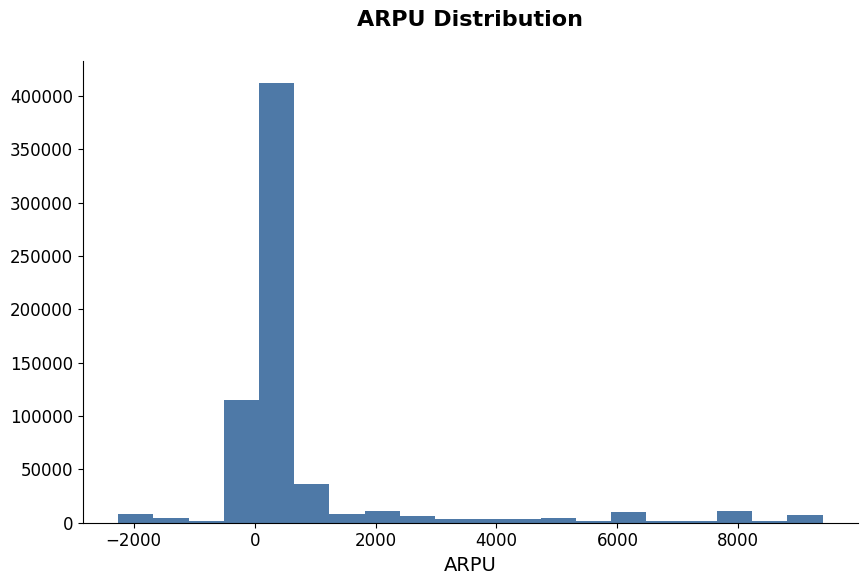

In [147]:
# Plot
plt.figure(figsize=(10,6))
plt.hist(df['arpu'], bins=20)
plt.title('ARPU Distribution')
plt.xlabel('ARPU')
plt.show()

**ARPU Distribution Insights**

The histogram reveals several important characteristics about customer revenue patterns:

1. **Highly Concentrated Distribution**: The vast majority of customers fall within a narrow ARPU band near zero, creating a tall central peak that dominates the distribution.

2. **Long Right Tail**: A significant right-skew shows a small number of high-value customers generating substantially more revenue than the typical user.

3. **Negative Values**: The presence of negative ARPU values on the left suggests possible accounting adjustments, credits, or data quality issues that require investigation.

4. **Distinct Revenue Tiers**: Several smaller peaks appear at regular intervals (around 2000, 6000, and 8000), potentially indicating pricing tier thresholds or subscription package levels.

5. **Outlier Influence**: Despite our earlier outlier treatment, some extreme values remain in the right tail, though at much lower frequencies than the primary distribution.

This distribution confirms the need for segment-specific strategies, as the revenue contribution varies dramatically across the customer base. The clustering around specific values also suggests natural breakpoints for customer segmentation.

In [148]:
# ARPU is negative here.
# Lets investigate
df.arpu.describe()

count    653753.000000
mean        781.196280
std        1807.269437
min       -2258.680000
25%         118.940000
50%         348.540000
75%         580.650000
max        9394.500000
Name: arpu, dtype: float64

In [149]:
# Now let us investigate how many people have negative arpu
df[df['arpu']<0].shape

(115942, 77)

In [150]:
# Let's calculate the percentage
115942/df.shape[0]

0.17734832574382067

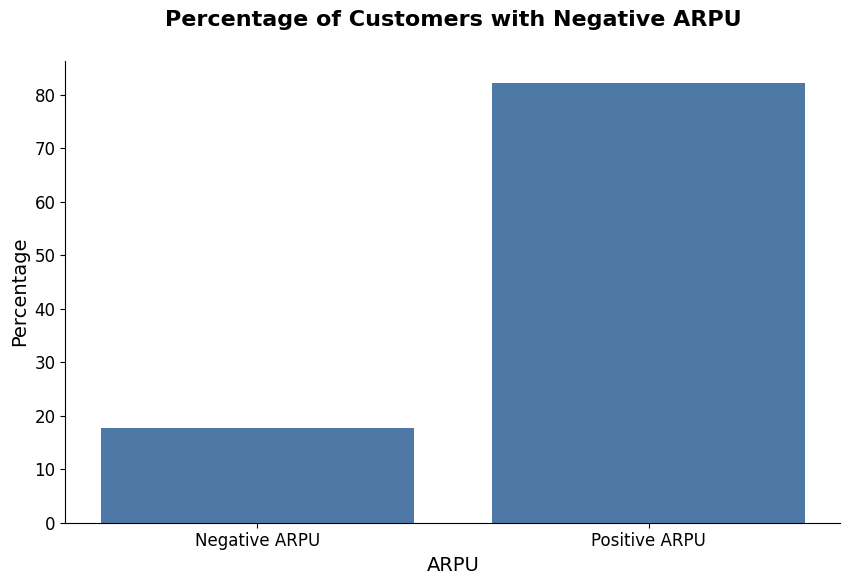

In [151]:
# calculate the percentage of customers with negative ARPU
negative_arpu_percentage = (df[df['arpu'] < 0]['arpu'].count() / df.shape[0]) * 100

# create a bar plot to visualize the negative ARPU percentage
plt.figure(figsize=(10,6))
plt.bar(['Negative ARPU', 'Positive ARPU'], [negative_arpu_percentage, 100 - negative_arpu_percentage])
plt.title('Percentage of Customers with Negative ARPU')
plt.xlabel('ARPU')
plt.ylabel('Percentage')
plt.show()

The chart confirms that approximately 18% of customers have negative ARPU values, while 82% maintain positive revenue generation. This distribution reveals several key insights:

1. The negative ARPU segment represents a significant minority that requires targeted investigation – nearly one in five customers are not contributing positively to revenue.

2. While the majority of customers (82%) generate positive revenue, the substantial negative segment likely impacts overall profitability and distorts average revenue calculations.

3. The binary distribution suggests a systematic pattern rather than random variation, pointing to specific business processes or customer segments driving negative values.

4. This clear delineation provides an opportunity for focused intervention – identifying and addressing the characteristics of the negative ARPU segment could significantly improve overall financial performance.

This finding reinforces the need to investigate customer attributes, service configurations, and lifecycle timing that correlate with negative ARPU to develop targeted solutions for this substantial customer segment.

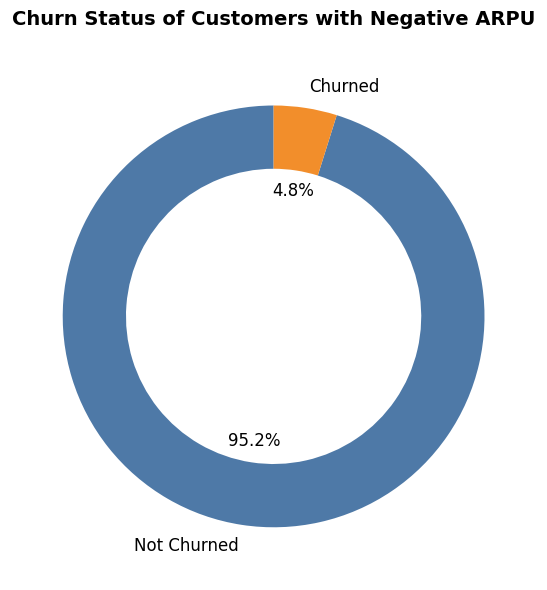

In [159]:
# Get the relationship between negative ARPU and churn status
churn_negative_arpu = df[df['arpu'] < 0]['Churn Value'].value_counts(normalize=True)

# Create dictionary with proper labels
proper_labels = {0: 'Not Churned', 1: 'Churned'}
churn_negative_arpu_labeled = churn_negative_arpu.rename(index=proper_labels)

# Create a donut chart with adjustable size
plt.figure(figsize=(8, 6))  # Adjust size as needed (width, height)
plt.pie(churn_negative_arpu_labeled, 
        labels=churn_negative_arpu_labeled.index, 
        colors=CUSTOM_PALETTE, 
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops=dict(width=0.3),  # Controls donut hole size
        textprops={'fontsize': 12})  # Adjusts text size

plt.title('Churn Status of Customers with Negative ARPU', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

**Negative ARPU Customer Insights**

The analysis reveals that 95.2% of negative ARPU customers continue using the service, with only 4.8% churning. This pattern suggests:

1. **Strategic Intent**: This likely represents a deliberate business approach rather than a problem, as these customers remain highly loyal

2. **Early Lifecycle Phase**: Negative ARPU likely indicates promotional periods or new customer onboarding where credits temporarily exceed usage

3. **Customer Confidence**: High retention demonstrates these customers see value in the service despite current negative revenue contribution

4. **Acquisition Strategy**: The pattern suggests an effective "invest now, profit later" customer acquisition methodology

5. **CLTV Reconsideration**: We should view these customers as investments rather than liabilities, tracking their progression toward positive revenue over time

This challenges the assumption that negative ARPU is problematic and instead reveals a potentially strategic customer development approach.

In [160]:
# Lets analyze further
negative_arpu_churn = df[(df['arpu'] < 0) & (df['Churn Value'] == 1)]
print("Number of customers with negative ARPU who churned: ", len(negative_arpu_churn['Customer ID']))

Number of customers with negative ARPU who churned:  5610


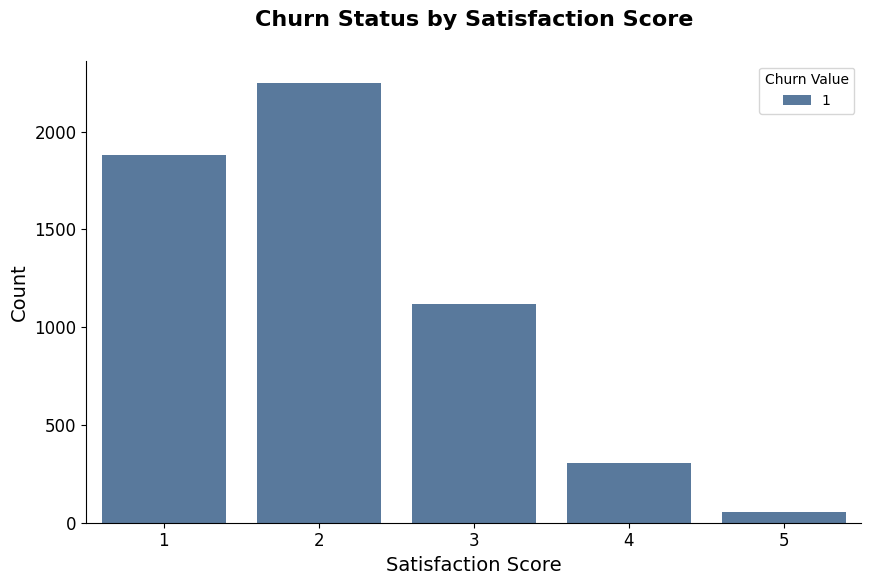

In [161]:
# Plot
plt.figure(figsize=(10,6))
sns.countplot(x='Satisfaction Score', hue='Churn Value', data=negative_arpu_churn)

# Title and label
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.title('Churn Status by Satisfaction Score')
plt.show()

## Feature Engineering

In [166]:
# Creating a new column called Tenure
df['tenure'] = df['Month']- df['Month of Joining'] + 1

In [167]:
# Define the variables to loop over (premium and other important variables which can have an impact on ARPU as per hypotheses)
service_columns = ['Phone Service', 'Multiple Lines', 'Internet Service', 
                  'Online Security', 'Online Backup', 'Device Protection Plan', 
                  'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 
                  'Streaming Music', 'Unlimited Data']

# Convert service columns to binary (assuming 'Yes'/'No' values)
for col in service_columns:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

In [168]:
# checking data types
df[service_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653753 entries, 0 to 653752
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   Phone Service           653753 non-null  int64
 1   Multiple Lines          653753 non-null  int64
 2   Internet Service        653753 non-null  int64
 3   Online Security         653753 non-null  int64
 4   Online Backup           653753 non-null  int64
 5   Device Protection Plan  653753 non-null  int64
 6   Premium Tech Support    653753 non-null  int64
 7   Streaming TV            653753 non-null  int64
 8   Streaming Movies        653753 non-null  int64
 9   Streaming Music         653753 non-null  int64
 10  Unlimited Data          653753 non-null  int64
dtypes: int64(11)
memory usage: 54.9 MB


In [169]:
# Sum of services
df['num_services'] = df[service_columns].sum(axis=1)

In [170]:
# Calculate total revenue metrics
df['total_revenue'] = df['arpu'] * df['tenure']

In [171]:
# Data usage ratio (5G vs 4G)
df['5g_usage_ratio'] = df['vol_5g'] / (df['vol_4g'] + df['vol_5g'] + 0.001)  # Adding small value to avoid division by zero


In [173]:
df.tail()

,Customer ID,Month,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,night_pck_user,fb_user,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,Customer Status,offer,outgoing_calls,data_usage,total_arpu,tenure,num_services,total_revenue,5g_usage_ratio
653748,ksdlqrgoihlmp162977,8,6.0,98932,Female,22.0,Yes,No,0.0,nxoadzllyxzg162977,bxpevtcjeectllyrdt162977,WA,Yakima County,America/Los_Angeles,509.0,US,46.32,-120.15,195.90,45.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.0,0.00,0.00,0.00,3990.18,2121.43,969.35,19.41,1050.93,122.57,0.0,0.11,41.57,54.13,0.0,12.0,20.31,16227.68,1098.84,793.17,0.0,1.0,242.51,0,Yes,9.0,0,0,0,Not Applicable,67,0,0,0,0,0,0,0,0,Bank Withdrawal,cgkwzaqcctmn82402,3,Not Applicable,Not Applicable,Stayed,No Offer,0.00,308.98,2087.91,3.0,0,587.70,0.998750
653749,ksdlqrgoihlmp162977,9,6.0,98932,Female,22.0,Yes,No,0.0,nxoadzllyxzg162977,bxpevtcjeectllyrdt162977,WA,Yakima County,America/Los_Angeles,509.0,US,46.32,-120.15,310.83,9.77,62.58,51.17,366.40,1.48,12.160000,365.42,128.61,8.21,0.0,32.35,23.44,30.17,26.70,69.91,45.69,41.93,14.31,23.27,0.0,0.02,70.42,36.95,267.0,2.0,3.10,217.40,101.26,99.67,0.0,1.0,68.94,0,Yes,1.0,0,0,0,Not Applicable,84,0,0,0,0,0,0,0,0,Wallet Balance,snzcbrohetar69724,4,Not Applicable,Not Applicable,Stayed,No Offer,1069.83,304.50,511.76,4.0,0,1243.32,0.985937
653750,ksdlqrgoihlmp162977,10,6.0,98932,Female,22.0,Yes,No,0.0,nxoadzllyxzg162977,bxpevtcjeectllyrdt162977,WA,Yakima County,America/Los_Angeles,509.0,US,46.32,-120.15,163.20,329.80,79.84,45.18,192.32,5.97,281.580000,190.72,219.40,5.67,0.0,6.73,26.69,12.82,126.08,367.51,14.29,75.43,35.22,13.98,0.0,0.09,9.42,14.96,5527.0,0.0,0.00,0.00,0.00,0.00,1.0,NaN,0.00,0,Yes,11.0,0,0,0,Not Applicable,0,0,0,0,0,0,0,0,0,Credit Card,girqesisbhkca38142,2,Not Applicable,Not Applicable,Stayed,B,785.34,0.00,163.20,5.0,0,816.00,0.000000
653751,ksdlqrgoihlmp162977,11,6.0,98932,Female,22.0,Yes,No,0.0,nxoadzllyxzg162977,bxpevtcjeectllyrdt162977,WA,Yakima County,America/Los_Angeles,509.0,US,46.32,-120.15,924.07,277.29,24.29,303.62,197.00,3.33,20.386877,162.19,200.57,8.61,0.0,35.87,2.46,0.88,93.52,284.86,50.67,23.32,1404.82,13.64,0.0,0.06,40.32,41.48,286.0,0.0,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0,Yes,9.0,0,0,0,Not Applicable,28,0,0,0,0,0,0,0,0,Bank Withdrawal,daplvxnhhqjt35633,3,Not Applicable,Not Applicable,Stayed,No Offer,938.82,28.00,924.07,6.0,0,5544.42,0.000000
653752,ksdlqrgoihlmp162977,12,6.0,98932,Female,22.0,Yes,No,0.0,nxoadzllyxzg162977,bxpevtcjeectllyrdt162977,WA,Yakima County,America/Los_Angeles,509.0,US,46.32,-120.15,346.56,40.53,121.47,290.16,12.41,10.39,1.740000,347.15,177.04,9.83,0.0,10.70,5.05,5.10,194.15,331.60,1847.90,119.09,4.81,2.29,0.0,0.12,78.25,43.14,594.0,0.0,0.00,0.00,0.00,0.00,NaN,NaN,0.00,1,Yes,11.0,0,0,0,Not Applicable,0,0,0,0,0,0,0,0,0,Credit Card,bwaebkwmzbxs93643,1,Support,Attitude of support person,Churned,No Offer,989.30,0.00,346.56,7.0,0,2425.92,0.000000


In [ ]:
# # 7. Risk score (higher means higher churn risk)
# # This assumes 'Satisfaction Score' is numeric and higher is better
# if 'Satisfaction Score' in df.columns:
#     df['churn_risk_score'] = (10 - df['Satisfaction Score']) * 10 + \
#                             df['tenure_months'] * (-0.5)  # Longer tenure reduces risk

# # 8. Referral activity
# df['is_referrer'] = df['Referred a Friend'].apply(lambda x: 1 if x == 'Yes' else 0)

# # 9. Service change likelihood (customers with few services might add more)
# df['service_growth_potential'] = ((len(service_columns) - df['total_services']) / 
#                                   len(service_columns)) * 10

# # 10. Customer status categorization
# if 'Customer Status' in df.columns:
#     status_map = {'Active': 3, 'Pending': 2, 'Dormant': 1, 'Inactive': 0}
#     df['status_score'] = df['Customer Status'].map(status_map)

# print("New features added to the dataframe successfully.")

In [ ]:
# # List of columns to drop
# columns_to_drop = [
#     # Location duplicates (keep basic location information but drop redundant columns)
#     'zip_code',  # Keep 'state' and 'county' instead
#     'area_codes',
#     'latitude',  # Unless you need precise geospatial analysis
#     'longitude', # Unless you need precise geospatial analysis
#     'timezone',  # Usually not predictive for telecom analyses
#     'country',   # If all customers are from the same country
    
#     # Redundant service identifiers
#     'Location ID',
#     'Service ID',
    
#     # Overly detailed call metrics (we've created aggregated features)
#     'loc_og_t2t', 'loc_og_t2m', 'loc_og_t2f', 'loc_og_t2c',
#     'std_og_t2t', 'std_og_t2m', 'std_og_t2f', 'std_og_t2c',
#     'isd_og', 'spl_og', 'og_others',
#     'loc_ic_t2t', 'loc_ic_t2m', 'loc_ic_t2f',
#     'std_ic_t2t', 'std_ic_t2m', 'std_ic_t2f', 'std_ic_t2o',
#     'spl_ic', 'isd_ic', 'ic_others',
#     'roam_ic', 'roam_og',
    
#     # Data we've transformed into better features
#     'Month',  # Since we calculated tenure
#     'Month of Joining',  # Since we calculated tenure
    
#     # Low-information features
#     'night_pck_user',  # Consider keeping if this is a specific interest
#     'fb_user',         # Consider keeping if social media usage is important
#     'aug_vbc_5g',      # Not clear what this represents
    
#     # If 'Churn Value' is your target, keep these for analysis but drop for modeling
#     # Only drop for modeling, keep for analysis:
#     # 'Churn Category',  
#     # 'Churn Reason',
    
#     # Keep 'Status ID' only if it provides different info than 'Customer Status'
#     'Status ID'
# ]

# # Drop the columns
# df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# # Check the shape before and after
# print(f"Original dataframe shape: {df.shape}")
# print(f"Cleaned dataframe shape: {df_cleaned.shape}")

# # To see the remaining columns
# print("\nRemaining columns:")
# print(list(df_cleaned.columns))

## **Correlation Analysis**

**Correlation** is a statistical measure that quantifies the relationship between two variables. It helps us understand how changes in one variable correspond to changes in another.

**What Correlation Measures**

Correlation quantifies the relationship strength and direction between two variables, indicating how changes in one variable relate to changes in another. The Pearson correlation coefficient is the most common measure for assessing linear relationships between continuous variables.

**Pearson Correlation Formula**

For variables $x$ and $y$ with n observations, the Pearson correlation coefficient $r$ is calculated as:

$$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x}) (y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}$$

Where:
- $x₁$ and $y₁$ represent individual data points
- $x̄$ and $ȳ$ are the means of each variable
- $n$ is the total number of observations

**Interpreting Correlation Values**

The correlation coefficient ranges from -1 to +1:

**Strength Interpretation**
- **0.8 to 1.0 (or -0.8 to -1.0)**: Very strong relationship
- **0.6 to 0.8 (or -0.6 to -0.8)**: Strong relationship
- **0.4 to 0.6 (or -0.4 to -0.6)**: Moderate relationship
- **0.2 to 0.4 (or -0.2 to -0.4)**: Weak relationship
- **0.0 to 0.2 (or 0.0 to -0.2)**: Very weak or no relationship

**Direction Interpretation**
- **Positive values**: Both variables move in the same direction
- **Negative values**: Variables move in opposite directions

Remember that correlation only indicates association, not causation, and only measures linear relationships between variables.

In [176]:
df.columns

Index(['Customer ID', 'Month', 'Month of Joining', 'zip_code', 'Gender', 'Age',
       'Married', 'Dependents', 'Number of Dependents', 'Location ID',
       'Service ID', 'state', 'county', 'timezone', 'area_codes', 'country',
       'latitude', 'longitude', 'arpu', 'roam_ic', 'roam_og', 'loc_og_t2t',
       'loc_og_t2m', 'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m',
       'std_og_t2f', 'std_og_t2c', 'isd_og', 'spl_og', 'og_others',
       'loc_ic_t2t', 'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m',
       'std_ic_t2f', 'std_ic_t2o', 'spl_ic', 'isd_ic', 'ic_others',
       'total_rech_amt', 'total_rech_data', 'vol_4g', 'vol_5g', 'arpu_5g',
       'arpu_4g', 'night_pck_user', 'fb_user', 'aug_vbc_5g', 'Churn Value',
       'Referred a Friend', 'Number of Referrals', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Streaming Data Consumption', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Suppo

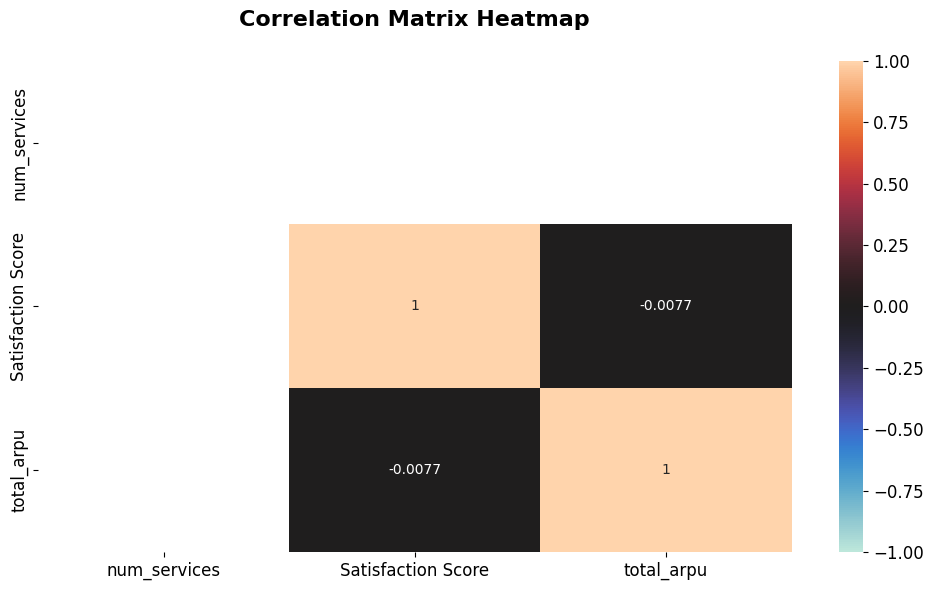

In [184]:
# Test correlation between number of services and satisfaction score to ARPU
correlation_df = df[['num_services', 'Satisfaction Score', 'total_arpu']].dropna()
correlation_df = correlation_df.corr()


plt.figure(figsize=(10,6))
sns.heatmap(correlation_df, annot=True, vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()